# Imports

In [373]:
import pandas as pd
import numpy as np

from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

#### Display options
%matplotlib inline
# %matplotlib qt
# %matplotlib notebook

%config InlineBackend.figure_format = 'retina'

# Jupytper Config
%config Completer.use_jedi = False
%config IPCompleter.greedy=True
pd.set_option('display.max_columns', None)

np.random.seed(42) # this is how to set a random seed. At the start


## Import External Files

In [377]:
df_users = pd.read_csv('./CSV/user_data.csv')
X = df_users
X.index = X['user']
X = X.drop('user',axis=1)

In [378]:
X.shape # 30 users, 62 columns.

(30, 62)

## Scaling

- Using multiple scalers for comparison.

In [379]:
from sklearn.preprocessing import StandardScaler # good bet, but max min may be better.
from sklearn.preprocessing import RobustScaler # will ignore outliers, but there shouldn't be any.

In [380]:
Xss = StandardScaler().fit_transform(X) # Kmeans 0.325 DBSCAN 0.370 AG 0.392
XRS = RobustScaler().fit_transform(X) # Kmeans 0.387 DBSCAN 0.416 AG 0.443

### Baseline

In [381]:
baseline = X['percent_correct'].mean()
print("Correct Answer Baseline:")
print(baseline)

Correct Answer Baseline:
0.5519733938383483


### Empty DataFrame for Labels

In [382]:
all_clusters = pd.DataFrame(None,index = X.index)

### DBSCAN

In [383]:
dbscan = DBSCAN(eps=9, min_samples=1, metric = 'euclidean').fit(XRS) # eps with highest Silhouette score
all_clusters['DBSCAN'] = dbscan.labels_ # Assign Labels to 
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')
print(f'Silhouette Coefficient: {metrics.silhouette_score(XRS, labels):.3}')
print(f'Calinski Harabasz Score: {metrics.calinski_harabasz_score(XRS, labels):.3}')
print(f'David Bouldin Coefficient: {metrics.davies_bouldin_score(XRS, labels):.3}')

# Reports not used as we don't have truth labels
# print(f'Homogeneity: {metrics.homogeneity_score(y, labels)}')
# print(f'Completeness: {metrics.completeness_score(y, labels)}')
# print(f'V-measure: {metrics.v_measure_score(y, labels)}')
# print(f'Adjusted Rand Index: {metrics.adjusted_rand_score(y, labels)}')
# print(f'Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(y, labels)}')

Estimated number of clusters: 4
Estimated number of noise points: 0
Silhouette Coefficient: 0.415
Calinski Harabasz Score: 8.18
David Bouldin Coefficient: 0.546


## Kmeans ( Use Loop To Assign )

Number of clusters: 2
Silhouette Coefficient: 0.351
Calinski Harabasz Score: 9.65
David Bouldin Coefficient: 1.47
--------------------------------
Number of clusters: 3
Silhouette Coefficient: 0.419
Calinski Harabasz Score: 11.6
David Bouldin Coefficient: 0.861
--------------------------------
Number of clusters: 4
Silhouette Coefficient: 0.45
Calinski Harabasz Score: 16.0
David Bouldin Coefficient: 0.767
--------------------------------
Number of clusters: 5
Silhouette Coefficient: 0.456
Calinski Harabasz Score: 15.9
David Bouldin Coefficient: 0.588
--------------------------------
Number of clusters: 6
Silhouette Coefficient: 0.274
Calinski Harabasz Score: 15.6
David Bouldin Coefficient: 0.953
--------------------------------
Number of clusters: 7
Silhouette Coefficient: 0.219
Calinski Harabasz Score: 15.1
David Bouldin Coefficient: 0.952
--------------------------------
Number of clusters: 8
Silhouette Coefficient: 0.264
Calinski Harabasz Score: 15.7
David Bouldin Coefficient: 0.81


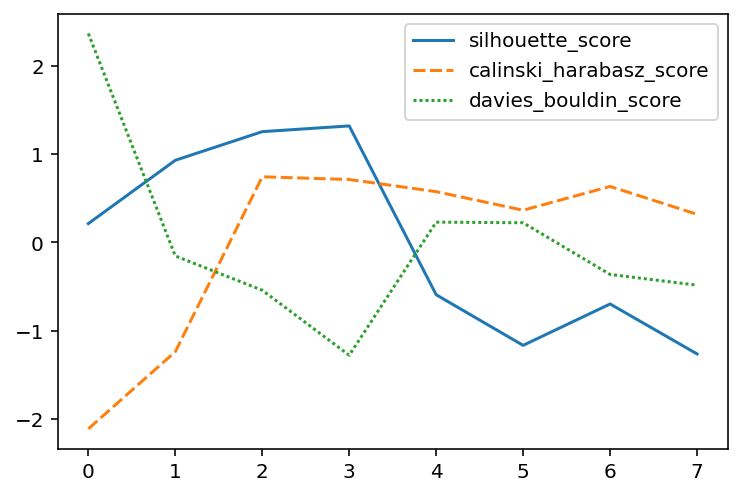

In [384]:
cluster_loops = [2,3,4,5,6,7,8,9]
Kmeans_results = pd.DataFrame()

for value in cluster_loops:
    km = KMeans(n_clusters=value).fit(XRS)
    name = 'Kmeans_' + str(value)
    all_clusters[name] = km.labels_
    labels = km.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print(f'Number of clusters: {n_clusters_}')
    print(f'Silhouette Coefficient: {metrics.silhouette_score(XRS, labels):.3}')
    print(f'Calinski Harabasz Score: {metrics.calinski_harabasz_score(XRS, labels):.3}')
    print(f'David Bouldin Coefficient: {metrics.davies_bouldin_score(XRS, labels):.3}')
    print('----'*8)
    Kmeans_results[name] = [metrics.silhouette_score(XRS, labels),metrics.calinski_harabasz_score(XRS, labels),metrics.davies_bouldin_score(XRS, labels)]

Kmeans_results = Kmeans_results.T
sns.lineplot(data=pd.DataFrame(StandardScaler().fit_transform(Kmeans_results),columns=['silhouette_score','calinski_harabasz_score','davies_bouldin_score']));

Number of clusters: 2
Silhouette Coefficient: 0.441
Calinski Harabasz Score: 9.29
David Bouldin Coefficient: 0.992
--------------------------------
Number of clusters: 3
Silhouette Coefficient: 0.406
Calinski Harabasz Score: 6.31
David Bouldin Coefficient: 0.572
--------------------------------
Number of clusters: 4
Silhouette Coefficient: 0.415
Calinski Harabasz Score: 8.18
David Bouldin Coefficient: 0.546
--------------------------------
Number of clusters: 5
Silhouette Coefficient: 0.452
Calinski Harabasz Score: 14.0
David Bouldin Coefficient: 0.541
--------------------------------
Number of clusters: 6
Silhouette Coefficient: 0.401
Calinski Harabasz Score: 15.4
David Bouldin Coefficient: 0.604
--------------------------------
Number of clusters: 7
Silhouette Coefficient: 0.377
Calinski Harabasz Score: 15.4
David Bouldin Coefficient: 0.557
--------------------------------
Number of clusters: 8
Silhouette Coefficient: 0.332
Calinski Harabasz Score: 14.3
David Bouldin Coefficient: 0.5

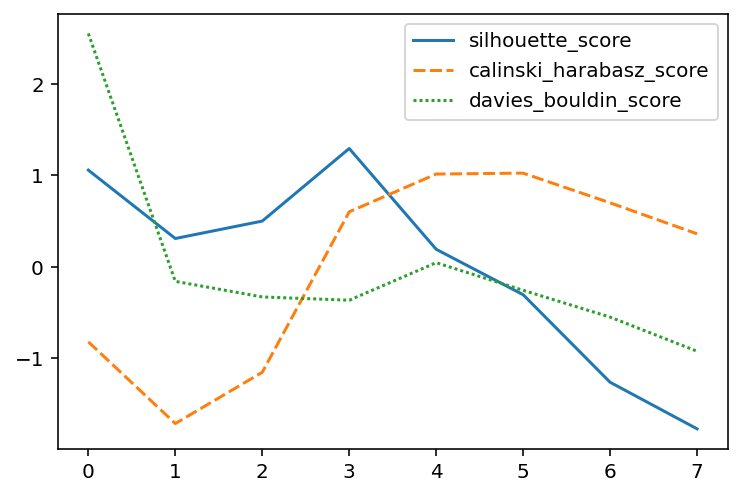

In [385]:
cluster_loops = [2,3,4,5,6,7,8,9]
AgC_results = pd.DataFrame()

for value in cluster_loops:
    ac = AgglomerativeClustering(n_clusters=value, affinity='euclidean', linkage='average').fit(XRS)
    name = 'AgC_' + str(value)
    all_clusters[name] = ac.labels_
    labels = ac.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print(f'Number of clusters: {n_clusters_}')
    print(f'Silhouette Coefficient: {metrics.silhouette_score(XRS, labels):.3}')
    print(f'Calinski Harabasz Score: {metrics.calinski_harabasz_score(XRS, labels):.3}')
    print(f'David Bouldin Coefficient: {metrics.davies_bouldin_score(XRS, labels):.3}')
    print('----'*8)
    AgC_results[name] = [metrics.silhouette_score(XRS, labels),metrics.calinski_harabasz_score(XRS, labels),metrics.davies_bouldin_score(XRS, labels)]

# Plot Results    
AgC_results = AgC_results.T
sns.lineplot(data=pd.DataFrame(StandardScaler().fit_transform(AgC_results),columns=['silhouette_score','calinski_harabasz_score','davies_bouldin_score']));

In [386]:
# Add 1 to all values so 0 values are included.
for col in all_clusters.columns:
    if col in all_clusters.columns:
        all_clusters[col] = all_clusters[col] + 1

all_clusters

,DBSCAN,Kmeans_2,Kmeans_3,Kmeans_4,Kmeans_5,Kmeans_6,Kmeans_7,Kmeans_8,Kmeans_9,AgC_2,AgC_3,AgC_4,AgC_5,AgC_6,AgC_7,AgC_8,AgC_9
user,,,,,,,,,,,,,,,,,
unknown_1,1,2,1,1,1,4,7,8,6,2,1,1,1,3,3,3,3
male_ncb_2,1,1,1,1,1,6,6,1,2,2,1,1,1,1,5,2,1
colourblind_type1_3,2,2,2,2,2,2,4,3,5,1,2,2,5,5,2,1,9
unknown_4,1,1,3,4,4,1,5,4,9,2,1,1,2,2,1,5,5
unknown_5,1,1,1,1,1,6,1,5,8,2,1,1,1,1,5,2,1
unknown_6,1,1,3,4,4,1,5,4,9,2,1,1,2,2,1,5,5
unknown_7,1,1,1,1,1,6,1,5,8,2,1,1,1,1,5,2,1
male_8,1,1,1,1,1,4,6,1,2,2,1,1,1,1,5,2,1
male_9,1,1,1,1,1,4,6,1,2,2,1,1,1,1,5,2,1


## Cluster Results into Feature Column

In [387]:
# cluster interated feature lables.
scaled_results = StandardScaler().fit_transform(all_clusters) # Consider Dropping DBSCAN (.drop('DBSCAN',axis=1))
cluster_feature = DBSCAN(eps=6, min_samples=1, metric = 'euclidean').fit(scaled_results)
all_clusters['cluster_feature'] = cluster_feature.labels_ # Assign Labels to all_clusters
labels = cluster_feature.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')
print(f'Silhouette Coefficient: {metrics.silhouette_score(XRS, labels):.3}')

Estimated number of clusters: 4
Estimated number of noise points: 0
Silhouette Coefficient: 0.415


In [388]:
all_clusters

,DBSCAN,Kmeans_2,Kmeans_3,Kmeans_4,Kmeans_5,Kmeans_6,Kmeans_7,Kmeans_8,Kmeans_9,AgC_2,AgC_3,AgC_4,AgC_5,AgC_6,AgC_7,AgC_8,AgC_9,cluster_feature
user,,,,,,,,,,,,,,,,,,
unknown_1,1,2,1,1,1,4,7,8,6,2,1,1,1,3,3,3,3,0
male_ncb_2,1,1,1,1,1,6,6,1,2,2,1,1,1,1,5,2,1,0
colourblind_type1_3,2,2,2,2,2,2,4,3,5,1,2,2,5,5,2,1,9,1
unknown_4,1,1,3,4,4,1,5,4,9,2,1,1,2,2,1,5,5,0
unknown_5,1,1,1,1,1,6,1,5,8,2,1,1,1,1,5,2,1,0
unknown_6,1,1,3,4,4,1,5,4,9,2,1,1,2,2,1,5,5,0
unknown_7,1,1,1,1,1,6,1,5,8,2,1,1,1,1,5,2,1,0
male_8,1,1,1,1,1,4,6,1,2,2,1,1,1,1,5,2,1,0
male_9,1,1,1,1,1,4,6,1,2,2,1,1,1,1,5,2,1,0


## Add Unsupervised Feature

In [389]:
X = pd.concat([X,all_clusters['cluster_feature']],axis=1)

## Open response data

In [390]:
# Our Data from ColourData.org
df = pd.read_csv('./CSV/colour_data_notebooks.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5821 entries, 0 to 5820
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user             5821 non-null   object
 1   correct          5821 non-null   int64 
 2   recorded_result  5821 non-null   object
 3   mask_image       5821 non-null   object
 4   cb_type1         5821 non-null   int64 
 5   cb_type2         5821 non-null   int64 
 6   ncb              5821 non-null   int64 
 7   datetime         5821 non-null   object
 8   random_spread    5821 non-null   int64 
 9   pallet_used      5821 non-null   object
 10  pallet_values    5821 non-null   object
 11  ishihara_list    5821 non-null   object
 12  COLORS_ON        5821 non-null   object
 13  COLORS_OFF       5821 non-null   object
dtypes: int64(5), object(9)
memory usage: 636.8+ KB


## Append Unsupervised Feature

In [391]:
# Take the new cluster labels and apply them to the users of our colour data
# We will use these as classification labels.
classification_feature= []
for i in df['user']:
    for j in X.index:
        if i == j:
            classification_feature.append(X['cluster_feature'].loc[i])

df['cluster_classification'] = classification_feature

In [392]:
df.to_csv('./CSV/colour_data_clustered.csv', header=True, index=False)





# Users Clustered Proceed to Classification






In [ ]:
# fin.